In [1]:
#Importing libraries
import numpy as np
import pandas as pd
 
    
    
import seaborn as sns

In [2]:
#reading data
df = pd.read_csv("taedata.txt",header = None)
df.head()

,0,1,2,3,4,5
0,1,23,3,1,19,3
1,2,15,3,1,17,3
2,1,23,3,2,49,3
3,1,5,2,2,33,3
4,2,7,11,2,55,3


# Dataset Preparation

In [3]:
#adding features name to the data
data=pd.DataFrame(df.values, columns = ["englishSpeaker", "CourseInstructor", "Course", "Semester","Classsize","grade"])
data.head()

,englishSpeaker,CourseInstructor,Course,Semester,Classsize,grade
0,1,23,3,1,19,3
1,2,15,3,1,17,3
2,1,23,3,2,49,3
3,1,5,2,2,33,3
4,2,7,11,2,55,3


# Checking null value

In [4]:
data.isnull().sum()

englishSpeaker      0
CourseInstructor    0
Course              0
Semester            0
Classsize           0
grade               0
dtype: int64

# Summary Statistics for numerical features(Classsize)

In [5]:
#Classsize is the numerical feature so we are finding summary stattistics for this feature
data.Classsize.describe()

count    151.000000
mean      27.867550
std       12.893758
min        3.000000
25%       19.000000
50%       27.000000
75%       37.000000
max       66.000000
Name: Classsize, dtype: float64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 6 columns):
englishSpeaker      151 non-null int64
CourseInstructor    151 non-null int64
Course              151 non-null int64
Semester            151 non-null int64
Classsize           151 non-null int64
grade               151 non-null int64
dtypes: int64(6)
memory usage: 7.2 KB


# Exploratory Data Analysis for Numerical features(EDA)

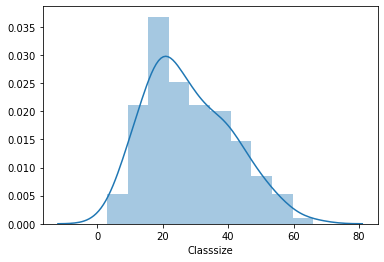

In [7]:
#Univariate Analysis
sns.distplot(data['Classsize'])

# Checking classsize is gaussian distributed or not

In [9]:
##QQ-plot
import statsmodels.api as sm 
import pylab as py 

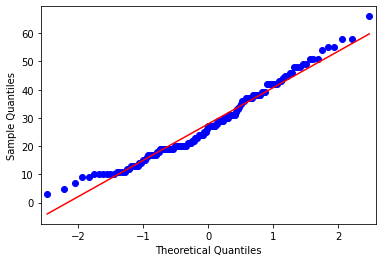

In [10]:
sm.qqplot(data.Classsize,line='s') 
py.show() 

# The feature Classsize follows Gaussian distribution

# Outliers in Numerical Features

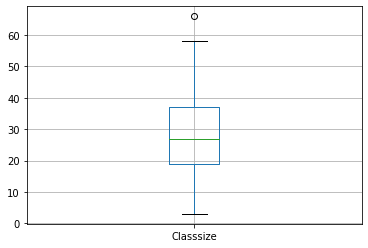

In [11]:
figure=data.boxplot(column="Classsize")

* Outliers are present in Classsize feature
* We need to remove outliers from the feature
* 3 sigma technique is used to remove outliers as the feature follows Gaussian distribution

# Outlier Detection

In [12]:
uppper_boundary=data['Classsize'].mean() + 3* data['Classsize'].std()
lower_boundary=data['Classsize'].mean() - 3* data['Classsize'].std()
print(lower_boundary), print(uppper_boundary),print(data['Classsize'].mean())

-10.813725641056461
66.5488249788048
27.867549668874172


(None, None, None)

In [13]:
data.loc[data['Classsize']>=66,'Classsize']=60
data.head()

,englishSpeaker,CourseInstructor,Course,Semester,Classsize,grade
0,1,23,3,1,19,3
1,2,15,3,1,17,3
2,1,23,3,2,49,3
3,1,5,2,2,33,3
4,2,7,11,2,55,3


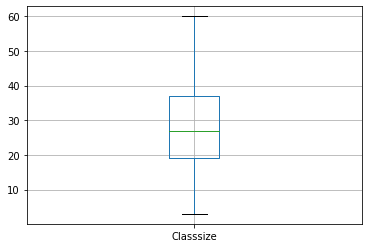

In [14]:
#Outlier removal
figure=data.boxplot(column="Classsize")

# Checking the balance of the class

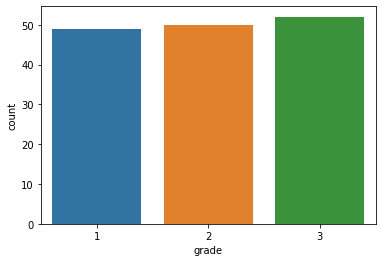

In [15]:
sns.countplot('grade',data=data)

In [16]:
data_grade=data['grade'].value_counts()
data_grade

3    52
2    50
1    49
Name: grade, dtype: int64

* The class is balance

# Bar graph for Categorical features

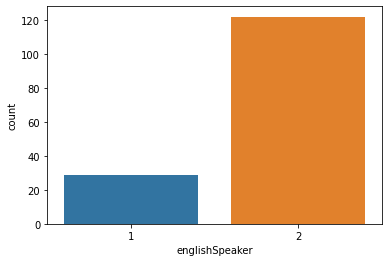

In [17]:
#checking for all categorical features
sns.countplot('englishSpeaker',data=data)

In [18]:
data_englishSpeaker=data['englishSpeaker'].value_counts()
data_englishSpeaker

2    122
1     29
Name: englishSpeaker, dtype: int64

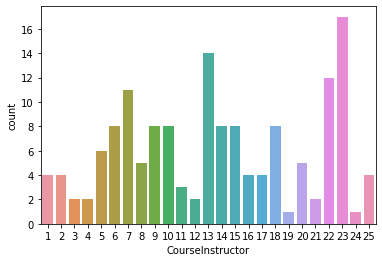

In [19]:
#Checking for CourseInstructor
sns.countplot('CourseInstructor',data=data)

In [20]:
data_CourseInstructor=data['CourseInstructor'].value_counts()
data_CourseInstructor.head()

23    17
13    14
22    12
7     11
10     8
Name: CourseInstructor, dtype: int64

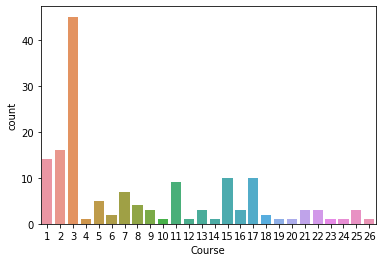

In [21]:
#Checking for Course
sns.countplot('Course',data=data)

In [22]:
data_Course=data['Course'].value_counts()
data_Course.head()

3     45
2     16
1     14
15    10
17    10
Name: Course, dtype: int64

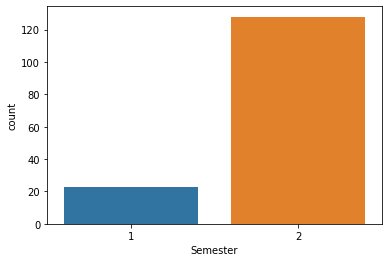

In [23]:
#checking for Semester
sns.countplot('Semester',data=data)

In [24]:
data_Semester=data['Semester'].value_counts()
data_Semester.head()

2    128
1     23
Name: Semester, dtype: int64

# Summer Semester and Regular Semester Analysis

# Summer semester data

In [25]:
summerSemesterdata=data[data['Semester']==1]
summerSemesterdata.head()

,englishSpeaker,CourseInstructor,Course,Semester,Classsize,grade
0,1,23,3,1,19,3
1,2,15,3,1,17,3
5,2,23,3,1,20,3
8,1,22,3,1,58,3
9,2,15,3,1,20,3


In [26]:
summerSemesterdata.shape

(23, 6)

# Regular semester data

In [30]:
#Regular semester data
regularSemesterdata=data[data['Semester']==2]
regularSemesterdata.head()

,englishSpeaker,CourseInstructor,Course,Semester,Classsize,grade
2,1,23,3,2,49,3
3,1,5,2,2,33,3
4,2,7,11,2,55,3
6,2,9,5,2,19,3
7,2,10,3,2,27,3


In [31]:
regularSemesterdata.shape

(128, 6)

# Feature Important

In [32]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model=ExtraTreesRegressor()

In [33]:
X_data=data.iloc[:,:5]
y_data=data['grade']

In [34]:
model.fit(X_data,y_data)

ExtraTreesRegressor()

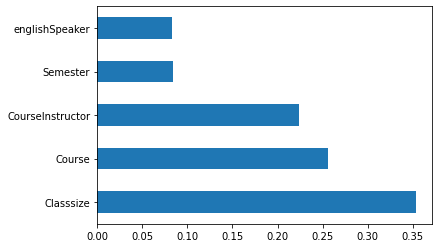

In [35]:
feature_importances=pd.Series(model.feature_importances_,index=X_data.columns)
feature_importances.nlargest(5).plot(kind='barh')

# Hypothesis testing

* Pearson’s correlation can not be used for categorical features. So we are using Chi-squared test.
* Hypothesis testing is performed on categorical feature using Chi-Squared test.

# Contingency Table showing correlation between CourseInstructor and Course

In [36]:
#contigency table
data_courseInstructor = pd.crosstab(data['Course'], 
                            data['CourseInstructor'],  
                               margins = False) 
data_courseInstructor.head()

CourseInstructor,1,2,3,4,5,6,7,8,9,10,...,16,17,18,19,20,21,22,23,24,25
Course,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,3,0,0,0
2,0,0,2,0,6,0,0,0,2,0,...,0,0,0,0,4,2,0,0,0,0
3,0,0,0,0,0,0,0,4,0,6,...,0,0,0,0,0,0,8,17,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,3,0,...,0,0,2,0,0,0,0,0,0,0


* 22 Instructor has taught 3 times course 1

* 3 Instructor has taught 2 times course 2

* Course X-axis,CourseInstructor Y-axis

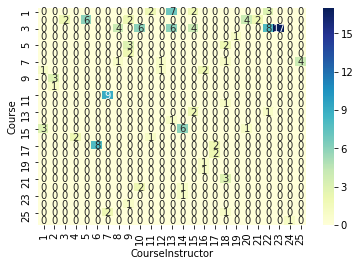

In [37]:
#Heat Map for contigency table
sns.heatmap(pd.crosstab(data.Course, data.CourseInstructor),
            cmap="YlGnBu", annot=True, cbar=True)

In [38]:
#contigency table
data_englishSpeaker= pd.crosstab([data.CourseInstructor,data.Course], 
                            data['englishSpeaker'],  
                               margins = False) 
data_englishSpeaker.head()

englishSpeaker           1  2
CourseInstructor Course      
1                8       0  1
                 15      0  3
2                9       0  3
                 10      0  1
3                2       0  2

* CourseInstructor 1 has taught courses 8 and 15 and he is english non-speaker,course 15 has been taught by other 2 courseInstructor which were also english non-speaker 

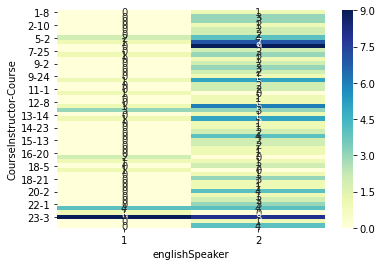

In [39]:
#Heat Map for contigency table
sns.heatmap(pd.crosstab([data.CourseInstructor,data.Course], data.englishSpeaker),
            cmap="YlGnBu", annot=True, cbar=True)

In [40]:
#contigency table
data_englishSpeaker= pd.crosstab([data.CourseInstructor,data.Course], 
                            [data.englishSpeaker,data.Semester],  
                               margins = False) 
data_englishSpeaker.head(10)

englishSpeaker           1     2   
Semester                 1  2  1  2
CourseInstructor Course            
1                8       0  0  0  1
                 15      0  0  2  1
2                9       0  0  0  3
                 10      0  0  0  1
3                2       0  0  0  2
4                16      0  0  0  2
5                2       0  2  0  4
6                17      0  1  0  7
7                11      0  0  1  8
                 25      0  0  0  2

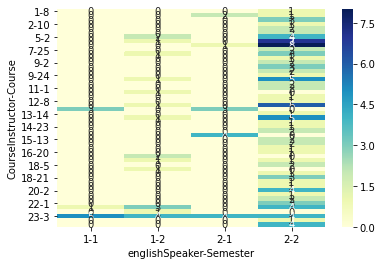

In [41]:
#Heat Map for contigency table
sns.heatmap(pd.crosstab([data.CourseInstructor,data.Course], [data.englishSpeaker,data.Semester]),
            cmap="YlGnBu", annot=True, cbar=True)

# Hypothesis Sample

H0: The features CourseInstructor and Course are independent (which means they are not associated).

H1: CourseInstructor and Course are not independent (which means they are associated).

H0: All CourseInstructor are not englishSpeaker

H1: All CourseInstructor are englishSpeaker(Rejecting null hypothesis)

In [42]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2

In [43]:
stat, p, dof, expected = chi2_contingency(data_courseInstructor)
print('dof=%d' % dof)
#print(expected)
# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
	print('H0: The features CourseInstructor and Course are independent')
else:
	print('H1: CourseInstructor and Course are not independent (which means they are associated).')
# interpret p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
	print('H0: The features CourseInstructor and Course are independent')
else:
	print('H1: CourseInstructor and Course are not independent (which means they are associated)')

dof=600
probability=0.950, critical=658.094, stat=1712.279
H0: The features CourseInstructor and Course are independent
significance=0.050, p=0.000
H0: The features CourseInstructor and Course are independent


In [44]:
stat, p, dof, expected = chi2_contingency(data_englishSpeaker)
print('dof=%d' % dof)
#print(expected)
# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
	print('H0:All CourseInstructor are not englishSpeaker')
else:
	print('H1:All CourseInstructor are englishSpeaker(Rejecting null hypothesis)')
# interpret p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
	print('H0:All CourseInstructor are not englishSpeaker')
else:
	print('H1:All CourseInstructor are englishSpeaker(Rejecting null hypothesis)')

dof=150
probability=0.950, critical=179.581, stat=187.962
H0:All CourseInstructor are not englishSpeaker
significance=0.050, p=0.019
H0:All CourseInstructor are not englishSpeaker


# Preprocessing and Feature Engineering

The quality of data is checked. The data has no missing value

The data has two categorical features: CourseInstructor and course.

CourseInstructor has 25 categories

Course has 26 categories

# Handling Categorical Features

#  1. One hot encoding

One hot encoding is performed on CourseInstructor and Course.

Dummy variable trap is handled.

We have 52 independent features.

Binary features Semester and englishInstructor are handled by replacing 1 as 0 and 2 as 1.

In [45]:
data1=pd.DataFrame(data,columns={"CourseInstructor","Course"})

In [46]:
#performing one hot encoding on the feature Course
data2= pd.get_dummies(data1.Course,prefix='Course',drop_first=True)
data2.head()

,Course_2,Course_3,Course_4,Course_5,Course_6,Course_7,Course_8,Course_9,Course_10,Course_11,...,Course_17,Course_18,Course_19,Course_20,Course_21,Course_22,Course_23,Course_24,Course_25,Course_26
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [47]:
#performing one hot encoding on the feature CourseInstructor
data3 = pd.get_dummies(data1.CourseInstructor, prefix='CourseInstructor',drop_first=True)
data3.head()

,CourseInstructor_2,CourseInstructor_3,CourseInstructor_4,CourseInstructor_5,CourseInstructor_6,CourseInstructor_7,CourseInstructor_8,CourseInstructor_9,CourseInstructor_10,CourseInstructor_11,...,CourseInstructor_16,CourseInstructor_17,CourseInstructor_18,CourseInstructor_19,CourseInstructor_20,CourseInstructor_21,CourseInstructor_22,CourseInstructor_23,CourseInstructor_24,CourseInstructor_25
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
# As the feature englishSpeaker is binary we need to convert in 0 and 1 to get good accuracy
data4=pd.DataFrame(data,columns={"englishSpeaker"})
englishSpeaker1=[]
for i in data4.englishSpeaker:
    if i==1:
        englishSpeaker1.append(0)
    else :
        englishSpeaker1.append(1)
data4['englishSpeaker1']=englishSpeaker1
data4.head()

,englishSpeaker,englishSpeaker1
0,1,0
1,2,1
2,1,0
3,1,0
4,2,1


In [49]:
# As the feature Semester is binary we need to convert in 0 and 1 to get good accuracy
data5=pd.DataFrame(data,columns={"Semester"})
data5=pd.DataFrame(data,columns={"Semester"})
Semester1=[]
for i in data5.Semester:
    if i==1:
        Semester1.append(0)
    else :
        Semester1.append(1)
data5['Semester1']=Semester1
data5.head()

,Semester,Semester1
0,1,0
1,1,0
2,2,1
3,2,1
4,2,1


In [50]:
#Combining the dataframe
data6= pd.concat([data4, data5],axis=1)
data6.head()

,englishSpeaker,englishSpeaker1,Semester,Semester1
0,1,0,1,0
1,2,1,1,0
2,1,0,2,1
3,1,0,2,1
4,2,1,2,1


In [51]:
#taking englishSpeaker1 and Semester1
data7=pd.DataFrame(data6,columns={"englishSpeaker1","Semester1"})
data7.head()

,englishSpeaker1,Semester1
0,0,0
1,1,0
2,0,1
3,0,1
4,1,1


In [52]:
#combining the features
data8= pd.concat([data2, data3],axis=1)
data8.head()

,Course_2,Course_3,Course_4,Course_5,Course_6,Course_7,Course_8,Course_9,Course_10,Course_11,...,CourseInstructor_16,CourseInstructor_17,CourseInstructor_18,CourseInstructor_19,CourseInstructor_20,CourseInstructor_21,CourseInstructor_22,CourseInstructor_23,CourseInstructor_24,CourseInstructor_25
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [53]:
#combining the features
data10=pd.concat([data8, data7],axis=1)
data10.head()

,Course_2,Course_3,Course_4,Course_5,Course_6,Course_7,Course_8,Course_9,Course_10,Course_11,...,CourseInstructor_18,CourseInstructor_19,CourseInstructor_20,CourseInstructor_21,CourseInstructor_22,CourseInstructor_23,CourseInstructor_24,CourseInstructor_25,englishSpeaker1,Semester1
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,1


In [54]:
#Storing the feature Classsize in a seperate dataframe
data9=pd.DataFrame(data,columns={"Classsize"})
data9.head()

,Classsize
0,19
1,17
2,49
3,33
4,55


# Feature Scaling

In [55]:
#from sklearn.preprocessing import StandardScaler
#sc= StandardScaler()
from sklearn.preprocessing import MinMaxScaler
sc= MinMaxScaler()
classsize = sc.fit_transform(data9)

In [56]:
data11=pd.DataFrame(classsize, columns=['classsize']) 
data11.head()

,classsize
0,0.280702
1,0.245614
2,0.807018
3,0.526316
4,0.912281


In [57]:
X= pd.concat([data11, data10],axis=1)
X.head()

,classsize,Course_2,Course_3,Course_4,Course_5,Course_6,Course_7,Course_8,Course_9,Course_10,...,CourseInstructor_18,CourseInstructor_19,CourseInstructor_20,CourseInstructor_21,CourseInstructor_22,CourseInstructor_23,CourseInstructor_24,CourseInstructor_25,englishSpeaker1,Semester1
0,0.280702,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0.245614,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0.807018,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
3,0.526316,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0.912281,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1


In [58]:
y=data['grade']
y.head()

0    3
1    3
2    3
3    3
4    3
Name: grade, dtype: int64

# Model Creation

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0)

In [61]:
classifier=RandomForestClassifier()
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
y_pred1=classifier.predict_proba(X_test)

In [62]:
from sklearn.metrics import accuracy_score,roc_auc_score
print("Accuracy_score: {}".format(accuracy_score(y_test,y_pred)))

Accuracy_score: 0.875


In [63]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix

In [64]:
confusion_matrix(y_test, y_pred)

array([[7, 0, 0],
       [0, 3, 2],
       [0, 0, 4]])

In [65]:
print("=== Classification Report ===")
print(classification_report(y_test, y_pred))

=== Classification Report ===
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         7
           2       1.00      0.60      0.75         5
           3       0.67      1.00      0.80         4

    accuracy                           0.88        16
   macro avg       0.89      0.87      0.85        16
weighted avg       0.92      0.88      0.87        16



This means that all your positive samples are classified as positive samples and none of the positive samples are classified incorrectly.

While precision refers to the percentage of your results which are relevant, recall refers to the percentage of total relevant results correctly classified by your algorithm. ... For problems where both precision and recall are important, one can select a model which maximizes this F-1 score

# Hyperparameter Optimization

# Randomized Search Cv

In [66]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 1000,10,1500)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10,14]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4,6,8]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


In [67]:
rf=RandomForestClassifier()
rf_randomcv=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=100,cv=5,verbose=2,
                               random_state=100,n_jobs=-1)
### fit the randomized model
rf_randomcv.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   52.9s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  8.7min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed: 12.4min finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=100, verbose=2)

In [68]:
rf_randomcv.best_params_

{'n_estimators': 1400,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 230,
 'criterion': 'gini'}

In [69]:
rf_randomcv

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=100, verbose=2)

In [71]:
best_random_grid=rf_randomcv.best_estimator_

In [72]:
from sklearn.metrics import accuracy_score
y_pred=best_random_grid.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: {}".format(classification_report(y_test,y_pred)))

[[6 1 0]
 [0 3 2]
 [0 0 4]]
Accuracy Score 0.8125
Classification report:               precision    recall  f1-score   support

           1       1.00      0.86      0.92         7
           2       0.75      0.60      0.67         5
           3       0.67      1.00      0.80         4

    accuracy                           0.81        16
   macro avg       0.81      0.82      0.80        16
weighted avg       0.84      0.81      0.81        16



# Performed one-hot encoding on most 5 frequent categories and put 0 for remaining.

In [73]:
kdddata=data.copy()
kdddata1=pd.DataFrame(kdddata,columns={"CourseInstructor","Course"})

In [74]:
#Checking the categories in the dataset
for i in kdddata1.columns:
    print(i,":",len(kdddata1[i].unique()),"labels")

Course : 26 labels
CourseInstructor : 25 labels


In [75]:
kdddata1.CourseInstructor.value_counts().sort_values(ascending=False).head(10)

23    17
13    14
22    12
7     11
10     8
18     8
6      8
15     8
14     8
9      8
Name: CourseInstructor, dtype: int64

In [76]:
kdddata1.Course.value_counts().sort_values(ascending=False).head(10)

3     45
2     16
1     14
15    10
17    10
11     9
7      7
5      5
8      4
13     3
Name: Course, dtype: int64

In [77]:
#print top 10 features for CourseInstructor_10
CourseInstructor_10=kdddata1.CourseInstructor.value_counts().sort_values(ascending=False).head(10).index
CourseInstructor_10=list(CourseInstructor_10)
CourseInstructor_10

[23, 13, 22, 7, 10, 18, 6, 15, 14, 9]

In [78]:
#print top 10 features for Course
Course_10=kdddata1.Course.value_counts().sort_values(ascending=False).head(10).index
Course_10=list(Course_10)
Course_10

[3, 2, 1, 15, 17, 11, 7, 5, 8, 13]

In [79]:
import numpy as np
for categories in CourseInstructor_10:
    kdddata1[categories]=np.where(kdddata1['CourseInstructor']==categories,1,0)

In [80]:
kdddata1.head()

,Course,CourseInstructor,23,13,22,7,10,18,6,15,14,9
0,3,23,1,0,0,0,0,0,0,0,0,0
1,3,15,0,0,0,0,0,0,0,1,0,0
2,3,23,1,0,0,0,0,0,0,0,0,0
3,2,5,0,0,0,0,0,0,0,0,0,0
4,11,7,0,0,0,1,0,0,0,0,0,0


In [81]:
kdddata1 = kdddata1.add_suffix('CourseInstructor')
kdddata1.head()

,CourseCourseInstructor,CourseInstructorCourseInstructor,23CourseInstructor,13CourseInstructor,22CourseInstructor,7CourseInstructor,10CourseInstructor,18CourseInstructor,6CourseInstructor,15CourseInstructor,14CourseInstructor,9CourseInstructor
0,3,23,1,0,0,0,0,0,0,0,0,0
1,3,15,0,0,0,0,0,0,0,1,0,0
2,3,23,1,0,0,0,0,0,0,0,0,0
3,2,5,0,0,0,0,0,0,0,0,0,0
4,11,7,0,0,0,1,0,0,0,0,0,0


In [82]:
for categories in Course_10:
    kdddata1[categories]=np.where(kdddata1['CourseCourseInstructor']==categories,1,0)

In [83]:
kdddata1.head()

,CourseCourseInstructor,CourseInstructorCourseInstructor,23CourseInstructor,13CourseInstructor,22CourseInstructor,7CourseInstructor,10CourseInstructor,18CourseInstructor,6CourseInstructor,15CourseInstructor,...,3,2,1,15,17,11,7,5,8,13
0,3,23,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,3,15,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
2,3,23,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,2,5,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,11,7,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [84]:
kdddata2=kdddata1.iloc[:,2:22]
kdddata2.head()

,23CourseInstructor,13CourseInstructor,22CourseInstructor,7CourseInstructor,10CourseInstructor,18CourseInstructor,6CourseInstructor,15CourseInstructor,14CourseInstructor,9CourseInstructor,3,2,1,15,17,11,7,5,8,13
0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [85]:
kdddata2.shape

(151, 20)

In [86]:
#combining the features
kdddata3=pd.concat([data7, kdddata2],axis=1)
kdddata3.head()

,englishSpeaker1,Semester1,23CourseInstructor,13CourseInstructor,22CourseInstructor,7CourseInstructor,10CourseInstructor,18CourseInstructor,6CourseInstructor,15CourseInstructor,...,3,2,1,15,17,11,7,5,8,13
0,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
2,0,1,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,1,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [87]:
X_kddata= pd.concat([data11, kdddata3],axis=1)
X_kddata.head()

,classsize,englishSpeaker1,Semester1,23CourseInstructor,13CourseInstructor,22CourseInstructor,7CourseInstructor,10CourseInstructor,18CourseInstructor,6CourseInstructor,...,3,2,1,15,17,11,7,5,8,13
0,0.280702,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0.245614,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0.807018,0,1,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0.526316,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0.912281,1,1,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [88]:
ykddata=data['grade']

In [89]:
X_trainkdd, X_testdd, y_traindd, y_testdd = train_test_split(X_kddata, ykddata, test_size = 0.1, random_state = 0)

In [90]:
classifierkdd=RandomForestClassifier()
classifierkdd.fit(X_trainkdd,y_traindd)
y_predkdd=classifierkdd.predict(X_testdd)
y_pred1kdd=classifierkdd.predict_proba(X_testdd)

In [91]:
from sklearn.metrics import accuracy_score,roc_auc_score
print("Accuracy_score: {}".format(accuracy_score(y_testdd,y_predkdd)))

Accuracy_score: 0.6875


In [92]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix

In [93]:
confusion_matrix(y_testdd, y_predkdd)

array([[4, 1, 2],
       [0, 3, 2],
       [0, 0, 4]])

In [94]:
print("=== Classification Report ===")
print(classification_report(y_testdd, y_predkdd))

=== Classification Report ===
              precision    recall  f1-score   support

           1       1.00      0.57      0.73         7
           2       0.75      0.60      0.67         5
           3       0.50      1.00      0.67         4

    accuracy                           0.69        16
   macro avg       0.75      0.72      0.69        16
weighted avg       0.80      0.69      0.69        16



# Conclusion
As we can see from the result that method one for one-hot encoding is giving better result in our case.